In [2]:
# 라이브러리 불러오기

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
import os
import time

from tqdm.notebook import tqdm
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [3]:
# 그림 저장 위치 함수 만들기

def img_save(pic):
    path = 'C:/Users/GC/OneDrive - gc.gachon.ac.kr/가천대\대학원/1-1/탐색적 자료분석과 기계학습/프로젝트/Img/'    
    dir_ = path + pic + ".png"
    print(dir_)
    plt.savefig(dir_,format="png",dpi=300)

In [4]:
# 데이터 불러오기

df = pd.read_csv('C:/Users/GC/OneDrive - gc.gachon.ac.kr/가천대/대학원/1-1/탐색적 자료분석과 기계학습/프로젝트/final_data/income_evaluation.csv')

In [5]:
# 데이터 객체 확인
df.info()

# 행: 32561개, 변수: 15개

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [6]:
# 범주형 변수의 범주 확인

df['workclass'].unique()
df['education'].unique()
df['education-num'].unique()
df['marital-status'].unique()
df['occupation'].unique()
df['relationship'].unique()
df['race'].unique()
df['sex'].unique()
df['native-country'].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

In [7]:
# 범주형 변수의 범주중 '?'가 있지만 결측치로 처리가 돼있지 않다. '?'에 대한 결측치를 처리한다.

for i in tqdm(range(0,len(df.columns))):
    count = 0
    count = len(df[df[df.columns[i]] == ' ?'])
    print("%s의 '?'의 갯수는 %d개 입니다." %(df.columns[i],count))

'''
?의 갯수는 다음과 같다.
workclass: 1836개
occupation: 1843개
native-country: 583개
'''

# 3개의 변수에 대한 결측치 처리를 진행.

df = df[df['workclass'] != ' ?']
df = df[df['occupation'] != ' ?']
df = df[df['native-country'] != ' ?']
df = df.reset_index(drop=True)

# 결측치 처리결과 2399개의 행이 제거되고 30162개가 남았다.

  0%|          | 0/15 [00:00<?, ?it/s]

age의 '?'의 갯수는 0개 입니다.
workclass의 '?'의 갯수는 1836개 입니다.
fnlwgt의 '?'의 갯수는 0개 입니다.
education의 '?'의 갯수는 0개 입니다.
education-num의 '?'의 갯수는 0개 입니다.
marital-status의 '?'의 갯수는 0개 입니다.
occupation의 '?'의 갯수는 1843개 입니다.
relationship의 '?'의 갯수는 0개 입니다.
race의 '?'의 갯수는 0개 입니다.
sex의 '?'의 갯수는 0개 입니다.
capital-gain의 '?'의 갯수는 0개 입니다.
capital-loss의 '?'의 갯수는 0개 입니다.
hours-per-week의 '?'의 갯수는 0개 입니다.
native-country의 '?'의 갯수는 583개 입니다.
income의 '?'의 갯수는 0개 입니다.


In [1123]:
# ----------------------------------- 탐색적 자료분석 -----------------------------------------------------

In [8]:
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30157,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30158,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30159,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30160,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [9]:
df['income'].value_counts()

 <=50K    22654
 >50K      7508
Name: income, dtype: int64

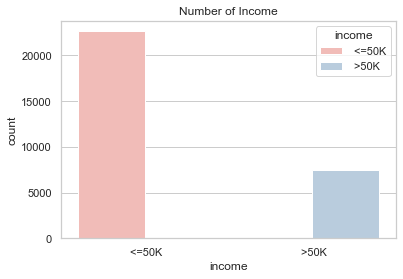

In [10]:
# target 분포 확인
sns.set_theme(style="whitegrid")
ax = sns.countplot(x=df["income"],hue="income",data=df,palette="Pastel1")
plt.title("Number of Income")
img_save("Number of Income")
plt.show()

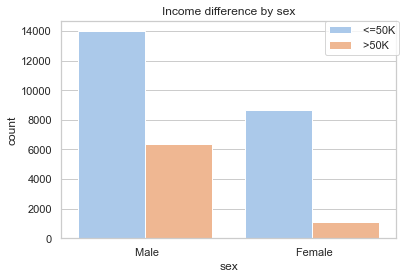

In [11]:
# 성별에따른 소득 차이
sns.set_theme(style="whitegrid")
ax = sns.countplot(x=df["sex"],hue="income",data=df,palette="pastel")
plt.title("Income difference by sex")
plt.legend(bbox_to_anchor=(1.01,1), borderaxespad=0)
img_save("Income difference by sex")
plt.show()

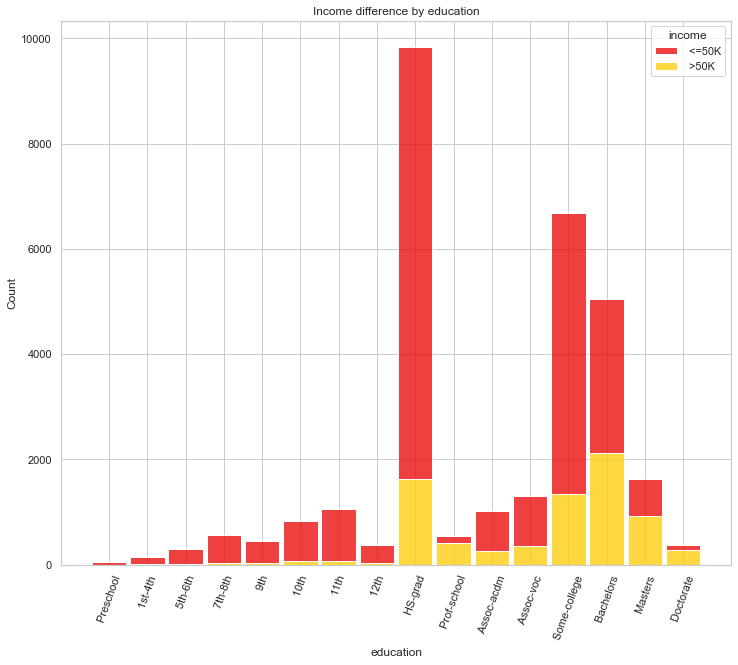

In [12]:
# 교육수준별 소득 확인
df_edu_count = df.groupby(['income'])['education'].value_counts().rename('Count').reset_index().sort_values('education')
df_edu_count=df_edu_count.reindex(index=[15,12,30,11,29,8,26,9,28,5,24,3,25,10,27,0,17,13,20,6,23,4,21,1,18,2,16,7,19,14,22])

plt.figure(figsize=(12,10))
sns.set_theme(style="whitegrid")
ax = sns.histplot(x='education',weights='Count',hue="income",data=df_edu_count,palette="hot",multiple='stack',
                 shrink=.9)
plt.title("Income difference by education")
plt.xticks(rotation=70)
img_save("Income difference by education")
plt.show()

In [13]:
df_edu_count

,income,education,Count
15,<=50K,Preschool,45
12,<=50K,1st-4th,145
30,>50K,1st-4th,6
11,<=50K,5th-6th,276
29,>50K,5th-6th,12
8,<=50K,7th-8th,522
26,>50K,7th-8th,35
9,<=50K,9th,430
28,>50K,9th,25
5,<=50K,10th,761


In [14]:
# 교육수준에 따른 비율 확인

print("HS-grad")
print(df_edu_count[df_edu_count['education']==" HS-grad"].Count / df_edu_count[df_edu_count['education']==" HS-grad"]['Count'].sum())
print("\n")

print("Bachelors")
print(df_edu_count[df_edu_count['education']==" Bachelors"].Count / df_edu_count[df_edu_count['education']==" Bachelors"]['Count'].sum())
print("\n")

print("Masters")
print(df_edu_count[df_edu_count['education']==" Masters"].Count / df_edu_count[df_edu_count['education']==" Masters"]['Count'].sum())
print("\n")

print("Doctorate")
print(df_edu_count[df_edu_count['education']==" Doctorate"].Count / df_edu_count[df_edu_count['education']==" Doctorate"]['Count'].sum())
print("\n")


HS-grad
0     0.835671
17    0.164329
Name: Count, dtype: float64


Bachelors
2     0.578509
16    0.421491
Name: Count, dtype: float64


Masters
7     0.435771
19    0.564229
Name: Count, dtype: float64


Doctorate
14    0.253333
22    0.746667
Name: Count, dtype: float64




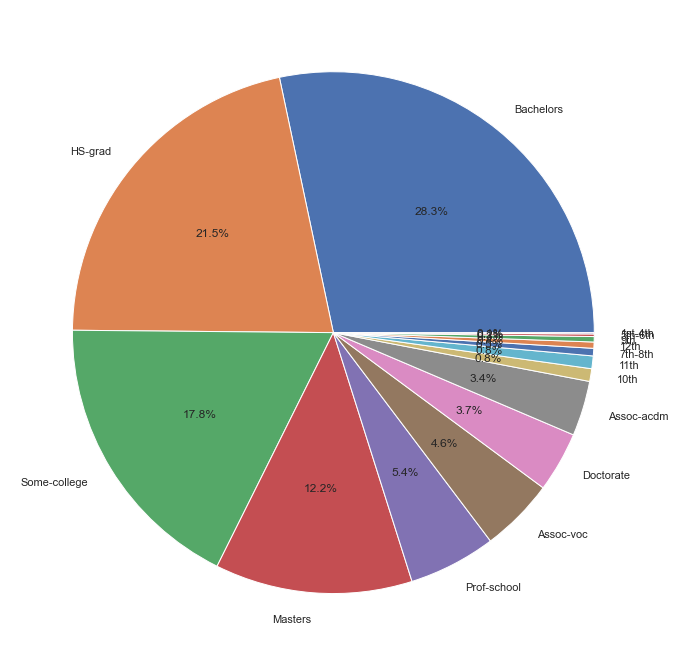

In [15]:
# 교육수준에 따른 비율 확인 (pie chart)
plt.figure(figsize=(16,12))

df_edu = df[df['income']==' >50K']
df_edu = df_edu.reset_index(drop=True)
df_edu_50K_count = df_edu.groupby(['income'])['education'].value_counts()

ratio = df_edu_50K_count.values
labels = []

for i in range(0,len(df_edu_50K_count.index)):
    labels.append(df_edu_50K_count.index[i][1].lstrip())
plt.pie(ratio, labels=labels, autopct='%.1f%%')
plt.show()

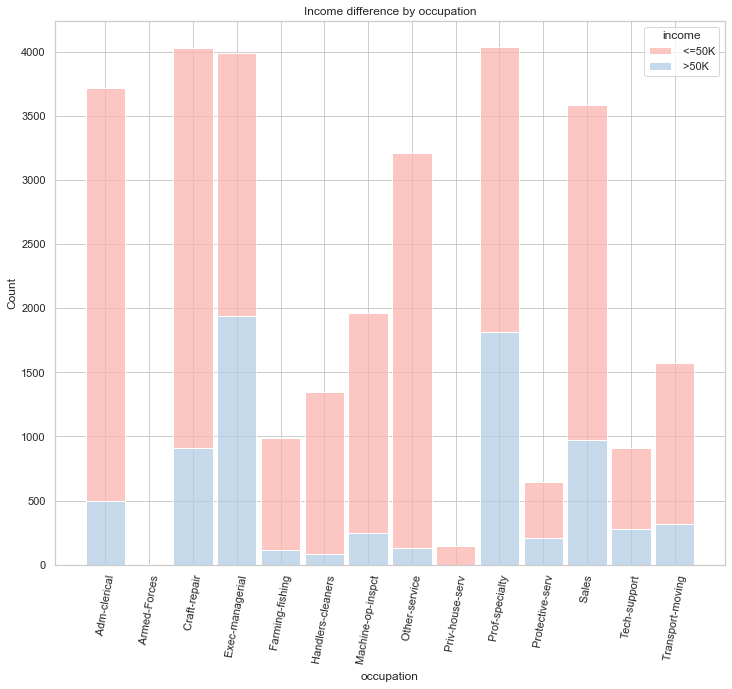

In [16]:
# 직업별 소득 확인
df_ocu_count = df.groupby(['income'])['occupation'].value_counts().rename('Count').reset_index().sort_values('occupation')

plt.figure(figsize=(12,10))
sns.set_theme(style="whitegrid")
ax = sns.histplot(x='occupation',weights='Count',hue="income",data=df_ocu_count,palette="Pastel1",multiple='stack',
                 shrink=.9)
plt.title("Income difference by occupation")
plt.xticks(rotation=80)
img_save("Income difference by occupation")
plt.show()

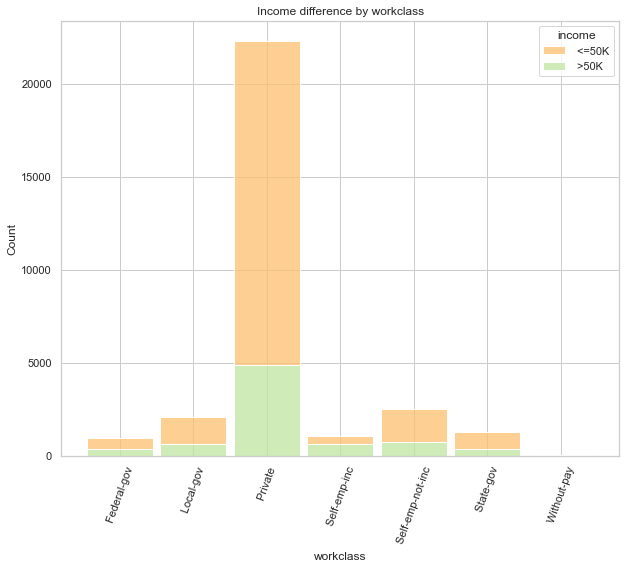

In [17]:
# 직업별 소득 확인
df_wok_count = df.groupby(['income'])['workclass'].value_counts().rename('Count').reset_index().sort_values('workclass')

plt.figure(figsize=(10,8))
sns.set_theme(style="whitegrid")
ax = sns.histplot(x='workclass',weights='Count',hue="income",data=df_wok_count,palette="Spectral",multiple='stack',
                 shrink=.9)
plt.title("Income difference by workclass")
img_save("Income difference by workclass")
plt.xticks(rotation=70)
plt.show()

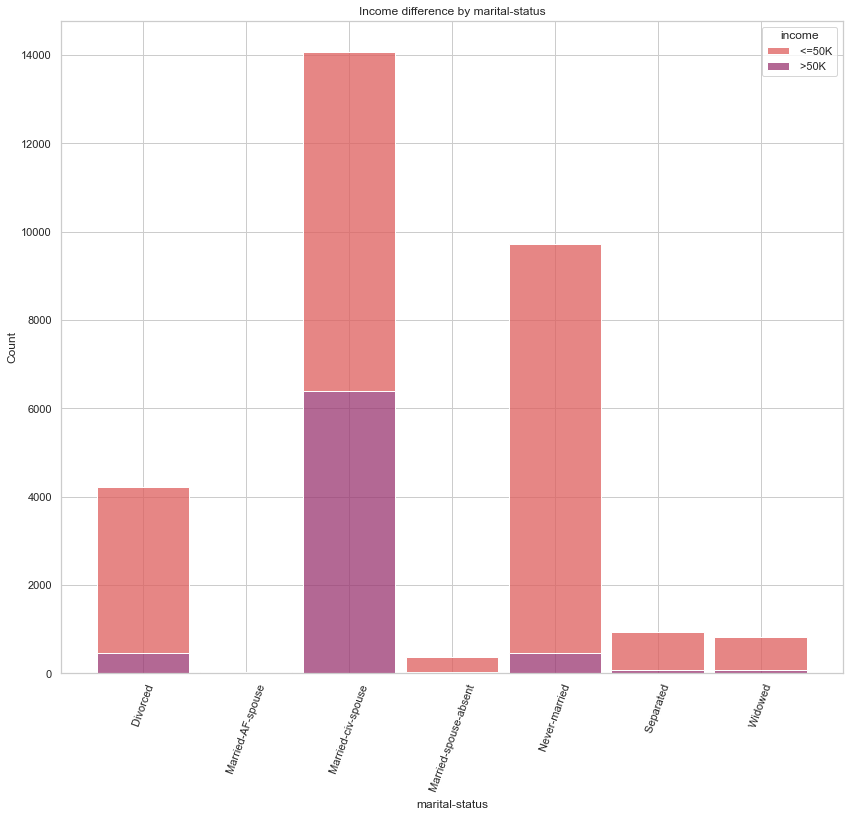

In [18]:
# 결혼상태별 소득 확인
df_mar_count = df.groupby(['income'])['marital-status'].value_counts().rename('Count').reset_index().sort_values('marital-status')

plt.figure(figsize=(14,12))
sns.set_theme(style="whitegrid")
ax = sns.histplot(x='marital-status',weights='Count',hue="income",data=df_mar_count,palette="flare",multiple='stack',
                 shrink=.9)
plt.title("Income difference by marital-status")
plt.xticks(rotation=70)
img_save("Income difference by marital-status")
plt.show()

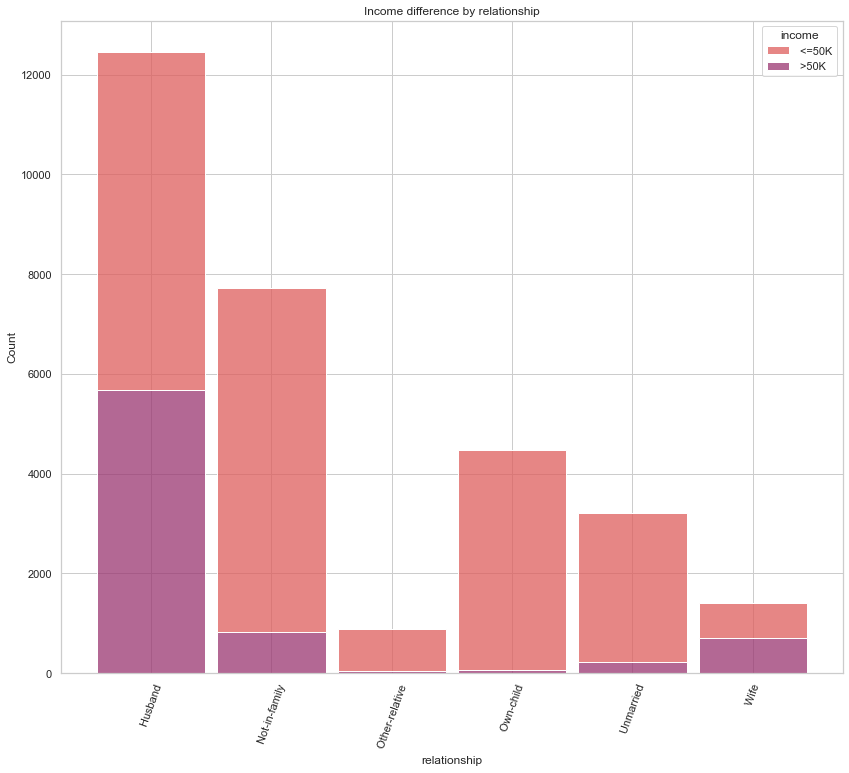

In [19]:
# 가족 관계 소득 확인
df_rel_count = df.groupby(['income'])['relationship'].value_counts().rename('Count').reset_index().sort_values('relationship')

plt.figure(figsize=(14,12))
sns.set_theme(style="whitegrid")
ax = sns.histplot(x='relationship',weights='Count',hue="income",data=df_rel_count,palette="flare",multiple='stack',
                 shrink=.9)
plt.title("Income difference by relationship")
plt.xticks(rotation=70)
img_save("Income difference by relationship")
plt.show()

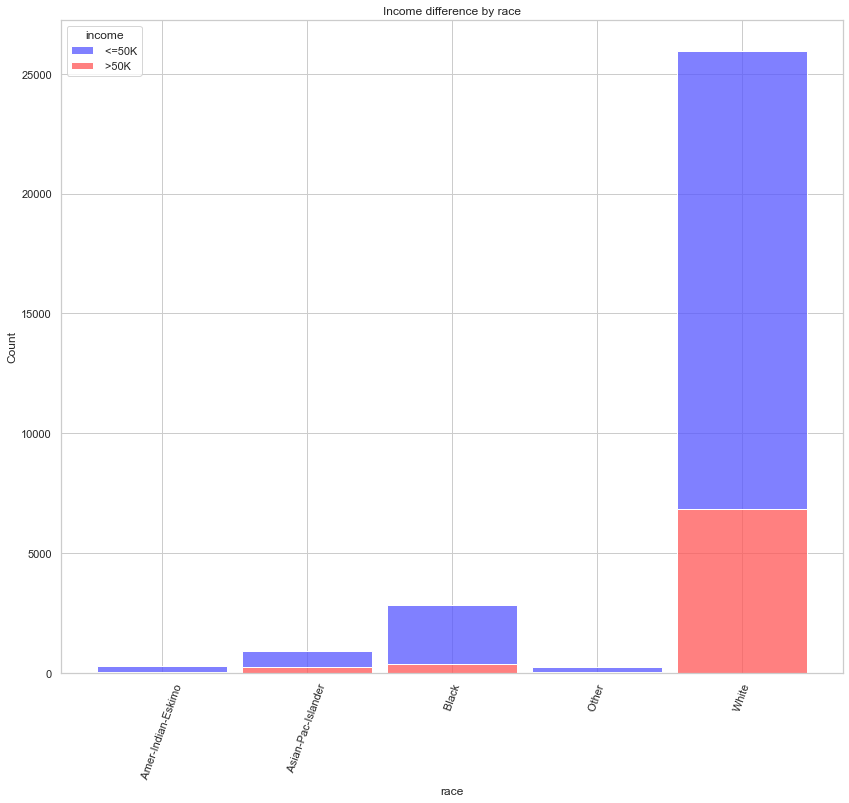

In [20]:
# 인종별 소득 확인
df_race_count = df.groupby(['income'])['race'].value_counts().rename('Count').reset_index().sort_values('race')

plt.figure(figsize=(14,12))
sns.set_theme(style="whitegrid")
ax = sns.histplot(x='race',weights='Count',hue="income",data=df_race_count,palette="seismic",multiple='stack',
                 shrink=.9)
plt.title("Income difference by race")
plt.xticks(rotation=70)
img_save("Income difference by race")
plt.show()

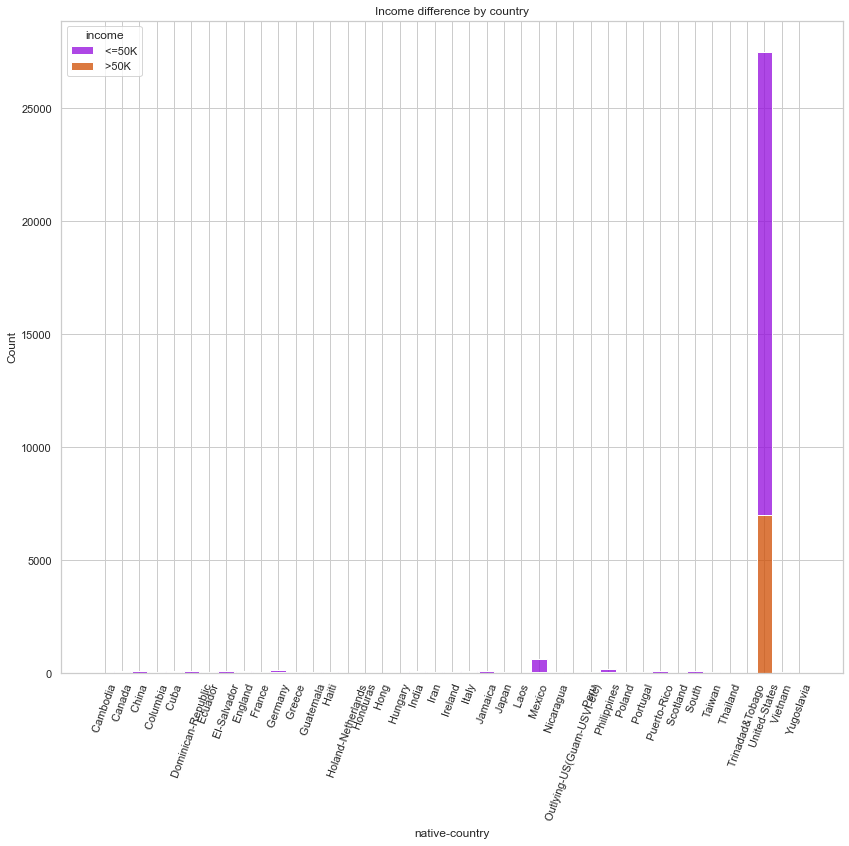

In [21]:
# 국가별 소득 확인
df_country_count = df.groupby(['income'])['native-country'].value_counts().rename('Count').reset_index().sort_values('native-country')

plt.figure(figsize=(14,12))
sns.set_theme(style="whitegrid")
ax = sns.histplot(x='native-country',weights='Count',hue="income",data=df_country_count,palette="gnuplot",multiple='stack',
                 shrink=.9)
plt.title("Income difference by country")
plt.xticks(rotation=70)
img_save("Income difference by country")
plt.show()

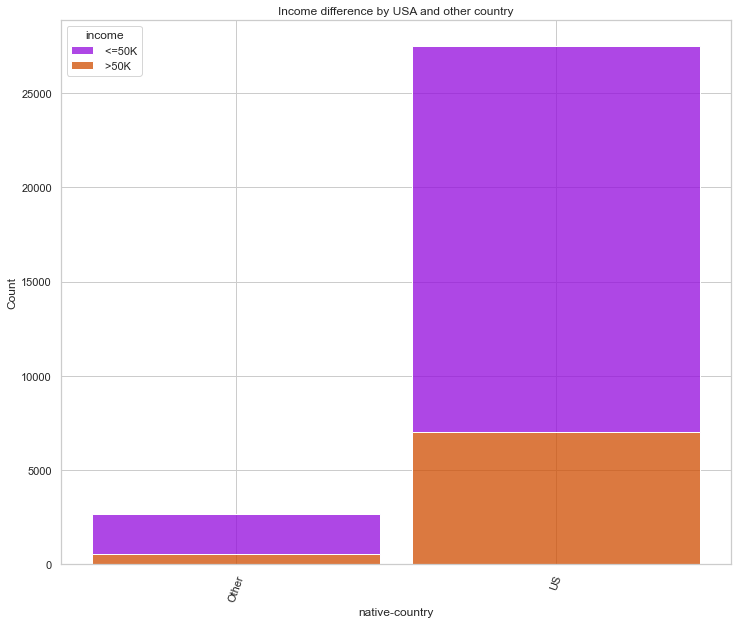

In [22]:
# 미국이 너무 뚜렷해서 미국을 제외한 국가와 미국을 비교.
df['native-country'] = np.where(df['native-country'] == " United-States","US","Other")
# 국가별 소득 확인
df_country2_count = df.groupby(['income'])['native-country'].value_counts().rename('Count').reset_index().sort_values('native-country')

plt.figure(figsize=(12,10))
sns.set_theme(style="whitegrid")
ax = sns.histplot(x='native-country',weights='Count',hue="income",data=df_country2_count,palette="gnuplot",multiple='stack',
                 shrink=.9)
plt.title("Income difference by USA and other country")
plt.xticks(rotation=70)
img_save("Income difference by USA and other country")
plt.show()

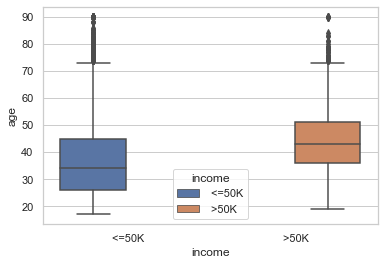

In [23]:
# 나이에 따른 소득 차이 확인
sns.set_theme(style='whitegrid')
ax = sns.boxplot(x='income',y='age',hue='income',data=df)
img_save("Income difference by age")
plt.show()

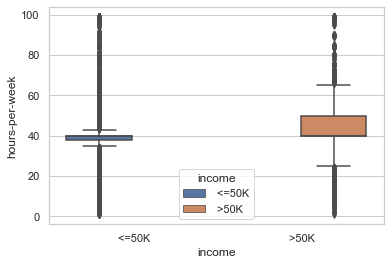

In [24]:
# 주간 근무 시간에 따른 소득차이 확인
ax = sns.boxplot(x='income',y='hours-per-week',hue='income',data=df)
img_save("Income difference by per-week")
plt.show()

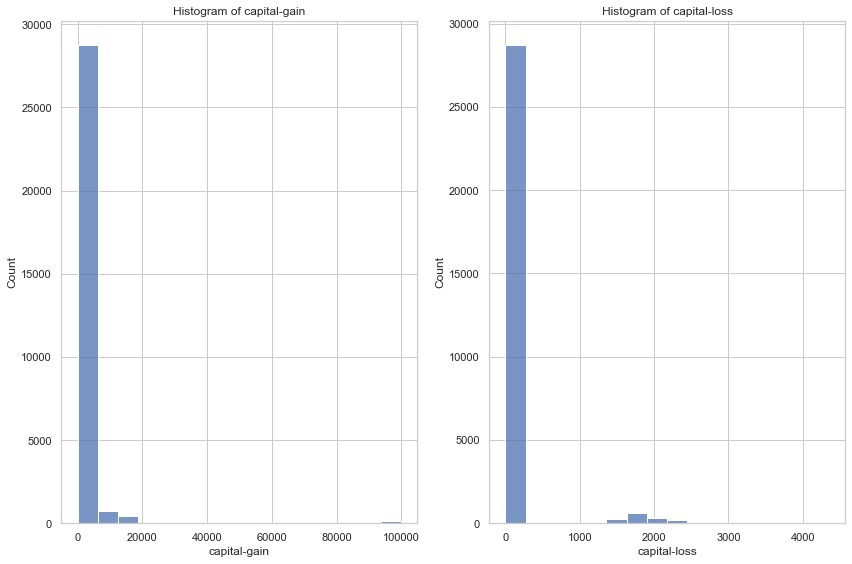

In [25]:
# capital-gain, capital-loss 히스트그램
plt.figure(figsize=(12,8))
ax1 = plt.subplot(1,2,1)
sns.histplot(x='capital-gain',data=df)
plt.title('Histogram of capital-gain')

ax2 = plt.subplot(1,2,2)
sns.histplot(x='capital-loss',data=df)
plt.title('Histogram of capital-loss')

plt.tight_layout()
img_save("Histogram of capital")
plt.show()

In [ ]:
#--------------------------------------데이터 분석--------------------------------------------------------

In [100]:
df = pd.read_csv('C:/Users/GC/OneDrive - gc.gachon.ac.kr/가천대/대학원/1-1/탐색적 자료분석과 기계학습/프로젝트/final_data/income_evaluation.csv')

df = df[df['workclass'] != ' ?']
df = df[df['occupation'] != ' ?']
df = df[df['native-country'] != ' ?']
df = df.reset_index(drop=True)

In [101]:
# 원핫인코더

df['native-country'] = np.where(df['native-country']== ' United-States',1,0)

work = pd.get_dummies(df['workclass'], prefix = "workclass")
edu = pd.get_dummies(df['education-num'], prefix = "education")
marital = pd.get_dummies(df['marital-status'], prefix = "marital-status")
occu = pd.get_dummies(df['occupation'], prefix = "occupation")
relation = pd.get_dummies(df['relationship'], prefix = "relationship")
race = pd.get_dummies(df['race'], prefix = "race")
sex = pd.get_dummies(df['sex'], prefix = "sex")
native = pd.get_dummies(df['native-country'], prefix = "native-country")

merge_col = [df, work,edu, marital, occu, relation, race, sex, native]

df = pd.concat(merge_col, axis = 1)

df['income'] = np.where(df['income'] == " <=50K",0,1)
df.head()
drop_col = ['fnlwgt','workclass','education','education-num','marital-status','occupation','relationship','race','sex','native-country']


df = df.drop(columns=drop_col)

In [102]:
x = df.drop(['income'],axis=1)
y = df['income'].values


In [103]:
# 타겟값 확인

df['income'].value_counts()

0    22654
1     7508
Name: income, dtype: int64

In [104]:
# 표준화를 위해 x,y 분리

x = df.drop(['income'],axis=1)
y = df['income'].values


# 모델의 정확도 저장
model_acc = {}

In [105]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [106]:
y_train

array([0, 0, 0, ..., 1, 0, 0])

In [111]:
# 로지스틱 회귀분석
start = time.time()

logit = LogisticRegression()
logit.fit(x_train,y_train)
acc = logit.score(x_test,y_test)

endtime= (time.time()-start)

print(acc)
print(endtime)

model_acc['Logit'] = acc

logit_probs = logit.predict_proba(x_test)
logit_probs = logit_probs[:,1]
logit_auc = roc_auc_score(y_test,logit_probs)

0.8468423669816012
0.2563362121582031


C:\Users\GC\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [112]:
y_pred = logit.predict(x_test)
metrics.confusion_matrix(y_test,y_pred)

array([[4214,  289],
       [ 635,  895]], dtype=int64)

In [113]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.94      0.90      4503
           1       0.76      0.58      0.66      1530

    accuracy                           0.85      6033
   macro avg       0.81      0.76      0.78      6033
weighted avg       0.84      0.85      0.84      6033



In [114]:
# Naive Bayes
start = time.time()

Gnb = GaussianNB()
Gnb.fit(x_train,y_train)
print(Gnb.score(x_test,y_test))

endtime= (time.time()-start)

print(endtime)

model_acc['Naive'] = Gnb.score(x_test,y_test)

Gnb_probs = Gnb.predict_proba(x_test)
Gnb_probs = Gnb_probs[:,1]
Gnb_auc = roc_auc_score(y_test,Gnb_probs)

0.7979446378252942
0.043884992599487305


In [115]:
y_pred = Gnb.predict(x_test)
metrics.confusion_matrix(y_test,y_pred)

array([[3583,  920],
       [ 299, 1231]], dtype=int64)

In [116]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.80      0.85      4503
           1       0.57      0.80      0.67      1530

    accuracy                           0.80      6033
   macro avg       0.75      0.80      0.76      6033
weighted avg       0.83      0.80      0.81      6033



In [117]:
# 의사결정나무
start = time.time()

tree = DecisionTreeClassifier()
tree.fit(x_train,y_train)
print(tree.score(x_test,y_test))

endtime= (time.time()-start)
print(endtime)

model_acc['Tree'] = tree.score(x_test,y_test)

tree_probs = tree.predict_proba(x_test)
tree_probs = tree_probs[:,1]
tree_auc = roc_auc_score(y_test,tree_probs)

0.8168407094314603
0.15956616401672363


In [118]:
y_pred = tree.predict(x_test)
metrics.confusion_matrix(y_test,y_pred)

array([[3982,  521],
       [ 584,  946]], dtype=int64)

In [119]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.88      0.88      4503
           1       0.64      0.62      0.63      1530

    accuracy                           0.82      6033
   macro avg       0.76      0.75      0.75      6033
weighted avg       0.81      0.82      0.82      6033



In [120]:
# 랜덤포레스트 하이퍼 파라미터 튜닝

params = { 'n_estimators' : [100,500,1000],
            'max_depth' : [6,10,12],
            'min_samples_split' : [2,8,16],
            'min_samples_leaf' : [1,8,16,],
            'max_features': ['auto',4,8,12,16]}

clf = RandomForestClassifier(random_state = 42,n_jobs = -1)
cv_grid = GridSearchCV(clf,param_grid=params,cv=3,n_jobs = -1)
cv_grid.fit(x_train,y_train)

print('예측 정확도:',  cv_grid.best_score_)
print('최적의 하이퍼파라미터:', cv_grid.best_params_)

예측 정확도: 0.8578474035393095
최적의 하이퍼파라미터: {'max_depth': 12, 'max_features': 12, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [121]:
# 랜덤포레스트
start = time.time()

rnd = RandomForestClassifier(n_estimators=100,max_depth=12,max_features=12, min_samples_leaf=1,
                             min_samples_split=2,random_state=42)
rnd.fit(x_train,y_train)
print(rnd.score(x_test,y_test))
endtime= (time.time()-start)

print(endtime)

model_acc['RNF'] = rnd.score(x_test,y_test)

rnd_probs = rnd.predict_proba(x_test)
rnd_probs = rnd_probs[:,1]
rnd_auc = roc_auc_score(y_test,rnd_probs)

0.8586109729819327
1.5927598476409912


In [122]:
y_pred = rnd.predict(x_test)
metrics.confusion_matrix(y_test,y_pred)

array([[4272,  231],
       [ 622,  908]], dtype=int64)

In [123]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.95      0.91      4503
           1       0.80      0.59      0.68      1530

    accuracy                           0.86      6033
   macro avg       0.84      0.77      0.79      6033
weighted avg       0.85      0.86      0.85      6033



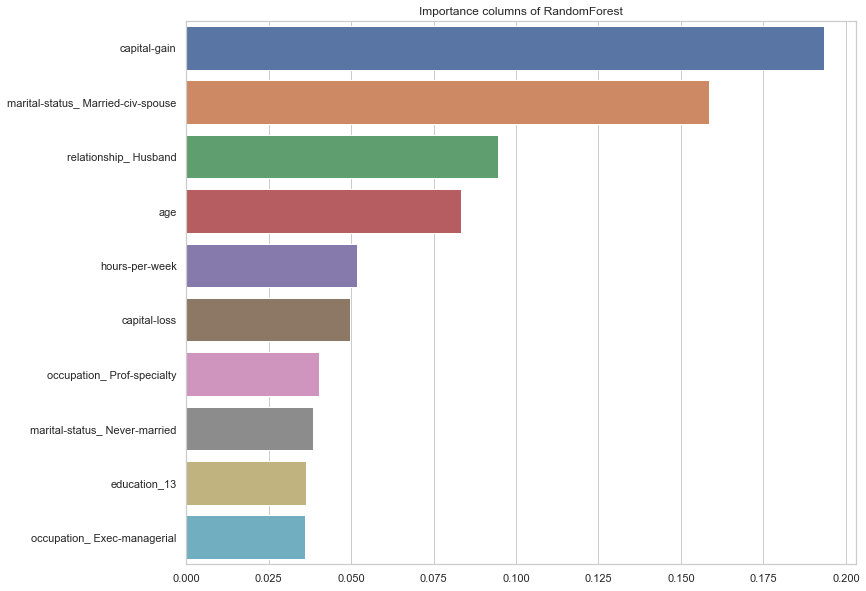

In [124]:
# 랜덤포레스트의 피쳐 중요도 시각화

col_importance_values = rnd.feature_importances_
col_importance = pd.Series(col_importance_values, index = x_train.columns)
col_importance = col_importance.sort_values(ascending=False)[:10]

plt.figure(figsize=(12,10))
plt.title('Importance columns of RandomForest')
sns.barplot(y=col_importance.index,x=col_importance)
img_save("Importance columns of RNF")
plt.show()

In [136]:
# knn
start = time.time()

knn = KNeighborsClassifier(n_neighbors = 17)
knn.fit(x_train,y_train)
print(knn.score(x_test,y_test))

endtime= (time.time()-start)
print(endtime)

knn_probs = knn.predict_proba(x_test)
knn_probs = knn_probs[:,1]
knn_auc = roc_auc_score(y_test,knn_probs)

0.8529753025029008
2.3008439540863037


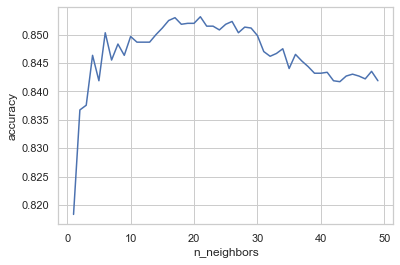

In [126]:
# 최적 K찾기
Knn_accuracy = []

neighbor_range = range(1, 50)

for k in neighbor_range:

    # 모델 생성

    knn = KNeighborsClassifier(n_neighbors=k)

    knn.fit(x_train, y_train)

    # 훈련 세트 정확도 저장
    
    Knn_accuracy.append(knn.score(x_test,y_test))


plt.plot(neighbor_range, Knn_accuracy, label="accuracy")

plt.ylabel("accuracy")

plt.xlabel("n_neighbors")

img_save("Find the Optimal K")

plt.show()

In [127]:
y_pred = knn.predict(x_test)
metrics.confusion_matrix(y_test,y_pred)

array([[4223,  280],
       [ 674,  856]], dtype=int64)

In [128]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.94      0.90      4503
           1       0.75      0.56      0.64      1530

    accuracy                           0.84      6033
   macro avg       0.81      0.75      0.77      6033
weighted avg       0.83      0.84      0.83      6033



In [129]:
# SVM
start = time.time()

svm = SVC(random_state = 42,probability=True)
svm.fit(x_train,y_train)
print(svm.score(x_test,y_test))
endtime= (time.time()-start)

print(endtime)

model_acc['SVM'] = svm.score(x_test,y_test) 

svm_probs = svm.predict_proba(x_test)
svm_probs = svm_probs[:,1]
svm_auc = roc_auc_score(y_test,svm_probs)

0.7972816177689375
175.37563753128052


In [130]:
y_pred = svm.predict(x_test)
metrics.confusion_matrix(y_test,y_pred)

array([[4379,  124],
       [1099,  431]], dtype=int64)

In [131]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.97      0.88      4503
           1       0.78      0.28      0.41      1530

    accuracy                           0.80      6033
   macro avg       0.79      0.63      0.65      6033
weighted avg       0.79      0.80      0.76      6033



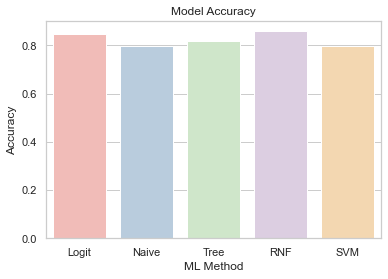

In [132]:
# 모델별 정확도 그림

sns.set_style('whitegrid')
sns.barplot(x=list(model_acc.keys()),y=list(model_acc.values()),palette='Pastel1')
plt.xlabel('ML Method')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
img_save('model_Accuracy')
plt.show()

In [137]:
model_acc

{'Logit': 0.8468423669816012,
 'Naive': 0.7979446378252942,
 'Tree': 0.8168407094314603,
 'RNF': 0.8586109729819327,
 'SVM': 0.7972816177689375}

In [138]:
logit_fpr, logit_tpr, _ = roc_curve(y_test,logit_probs)
Gnb_fpr, Gnb_tpr, _ = roc_curve(y_test,Gnb_probs)
tree_fpr, tree_tpr, _ = roc_curve(y_test,tree_probs)
rnd_fpr, rnd_tpr, _ = roc_curve(y_test,rnd_probs)
svm_fpr, svm_tpr, _ = roc_curve(y_test,svm_probs)
knn_fpr, knn_tpr, _ = roc_curve(y_test,knn_probs)


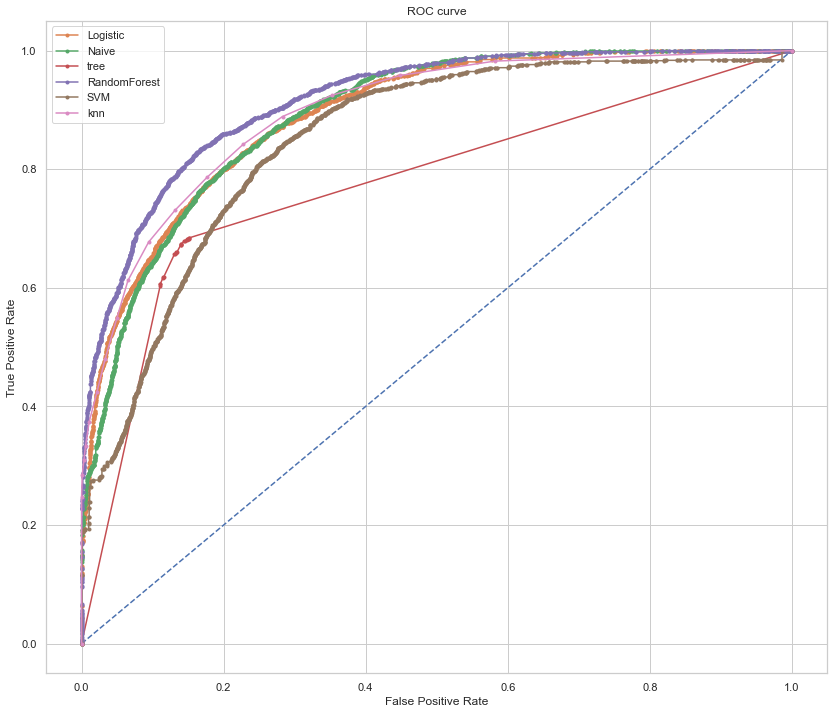

In [139]:
ns_probs = [0 for _ in range(len(y_test))]
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)

plt.figure(figsize=(14,12))
plt.plot(ns_fpr, ns_tpr, linestyle='--')
plt.plot(logit_fpr, logit_tpr, marker='.', label='Logistic')
plt.plot(Gnb_fpr, Gnb_tpr, marker='.', label='Naive')
plt.plot(tree_fpr, tree_tpr, marker='.', label='tree')
plt.plot(rnd_fpr, rnd_tpr, marker='.', label='RandomForest')
plt.plot(svm_fpr, svm_tpr, marker='.', label='SVM')
plt.plot(knn_fpr, knn_tpr, marker='.', label='knn')
 

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.title('ROC curve')
#img_save('model_Accuracy')
plt.show()

In [140]:
print(logit_auc)
print(Gnb_auc)
print(rnd_auc)
print(tree_auc)
print(svm_auc)
print(knn_auc)


0.8924054261574346
0.8912576800651418
0.9162802140620848
0.7745738861093331
0.849444233981993
0.8964516030707197
